In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2014-01-01'
end = '2024-12-31'

stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2014-01-02,27.624825,27.739730,27.504212,27.682899,73129082
1,2014-01-03,27.423307,27.719380,27.421570,27.671483,66917888
2,2014-01-06,27.729059,27.767277,27.459045,27.622096,71037271
3,2014-01-07,28.263626,28.284226,27.824359,27.919657,102486711
4,2014-01-08,28.322445,28.473584,28.125393,28.440825,90036218
...,...,...,...,...,...,...
2762,2024-12-23,195.990005,196.490005,191.630005,194.029999,15235900
2763,2024-12-24,197.570007,197.669998,195.197998,196.169998,6809800
2764,2024-12-26,197.100006,198.160004,195.869995,196.740005,7907900


In [4]:
ma_100_days = data.Close.rolling(100).mean()

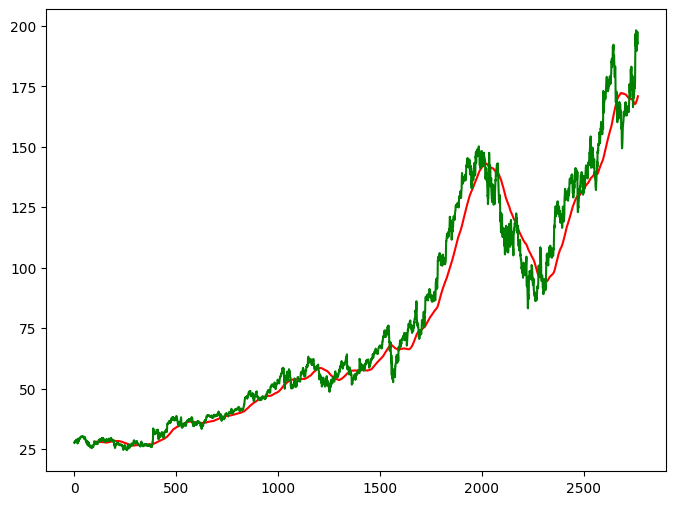

In [5]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [6]:
ma_200_days = data.Close.rolling(200).mean()

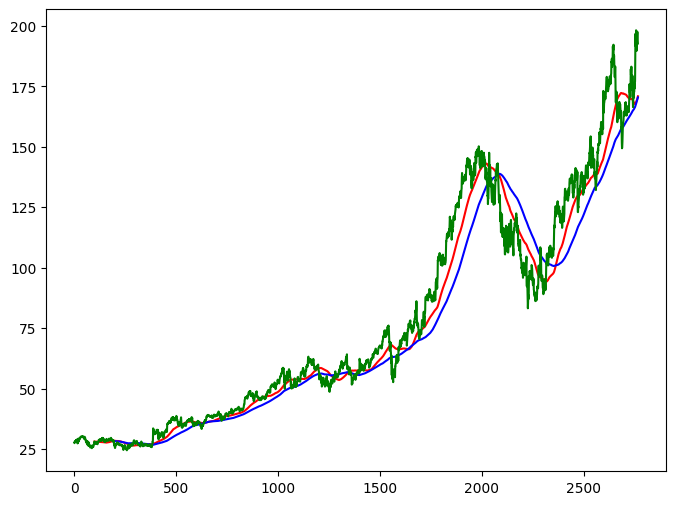

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
data.dropna(inplace=True)

In [9]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.8)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.8): len(data)])

In [10]:
data_train.shape[0], data_test.shape[0]

(2213, 554)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
data_train_scale = scaler.fit_transform(data_train)

In [13]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [14]:
from keras.layers import Dense, Dropout, LSTM, Input
from keras.models import Sequential

In [15]:
x, y = np.array(x), np.array(y)

In [16]:
model = Sequential()

model.add(Input(shape=(x.shape[1], 1)))

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [17]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [18]:
model.fit(x, y, epochs = 50, batch_size = 32, verbose=1)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 25s 198ms/step - loss: 0.0507
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 182ms/step - loss: 0.0069
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 192ms/step - loss: 0.0053
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 14s 210ms/step - loss: 0.0046
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 173ms/step - loss: 0.0057
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 165ms/step - loss: 0.0046
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 133ms/step - loss: 0.0053
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - loss: 0.0046
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - loss: 0.0050 
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - loss: 0.0042
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - loss: 0.0039
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - loss: 0.0046
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - loss: 0.0037
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - loss: 0.0068
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [20]:
pas_100_days = data_train.tail(100)

In [21]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [22]:
data_test_scale = scaler.fit_transform(data_test)

In [23]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [24]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step  


In [25]:
scale = 1/scaler.scale_

In [26]:
y_predict = y_predict*scale

In [27]:
y = y*scale

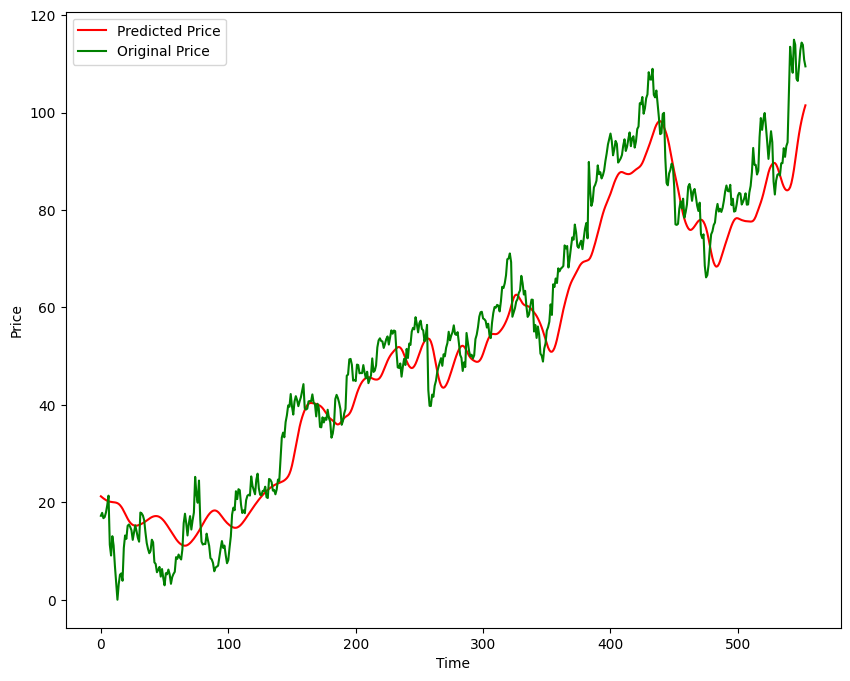

In [28]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
model.save('Stock Predictions Model.keras')